In [98]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [99]:
country_list={'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Denmark',
 'Estonia', 'Finland', 'France', 'Germany' ,'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 
 'Latvia', 'Lithuania', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovenia', 
 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey'}

In [100]:
df = pd.read_csv('COVID-19_vaccination_rates.csv') 
df=df.loc[(df["date"]=="2021-10-25")]#.loc[(df["location"].isin(country_list))] # select date and countries
df=df[["location","people_fully_vaccinated_per_hundred"]] # reduce to countries and percentage of vaccinated ppl
df.rename(columns={'location': 'Country Name'}, inplace=True)
df=df.loc[(df["people_fully_vaccinated_per_hundred"]==df["people_fully_vaccinated_per_hundred"])]
df

,Country Name,people_fully_vaccinated_per_hundred
568,Africa,5.53
901,Albania,30.57
2713,Argentina,55.56
3219,Aruba,71.37
3578,Asia,41.54
...,...,...
65140,Vietnam,22.23
65472,Wales,70.69
65732,Wallis and Futuna,49.25
66097,World,37.62


In [101]:
df0 = pd.read_csv('gdp_per_capita.csv') 
df0=df0[["Country Name","2020"]] # select countries and reduce to gdp
df0.rename(columns={'2020': 'gdp_per_capita_2020'}, inplace=True)
df0=df0.loc[(df0["gdp_per_capita_2020"]==df0["gdp_per_capita_2020"])]
#df1 = df0[df0['gdp_per_capita_2020'] > 30000]

In [102]:
df0=df0.loc[(df0["gdp_per_capita_2020"]>=30000)] ## we want spain, portugal,... -> 30000
data = pd.merge(df0, df, on=["Country Name"])
#data0 = pd.merge(df1, df, on=["Country Name"])
data0=data
data

,Country Name,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Australia,52397.387048,61.01
1,Austria,55648.874565,62.03
2,Belgium,52626.581638,73.63
3,Bahrain,43739.561523,65.11
4,Canada,48090.992167,73.73
5,Switzerland,71760.586213,62.92
6,Cyprus,38458.191262,63.42
7,Germany,54263.649615,65.77
8,Denmark,60551.640172,75.72
9,Spain,38343.155224,79.69


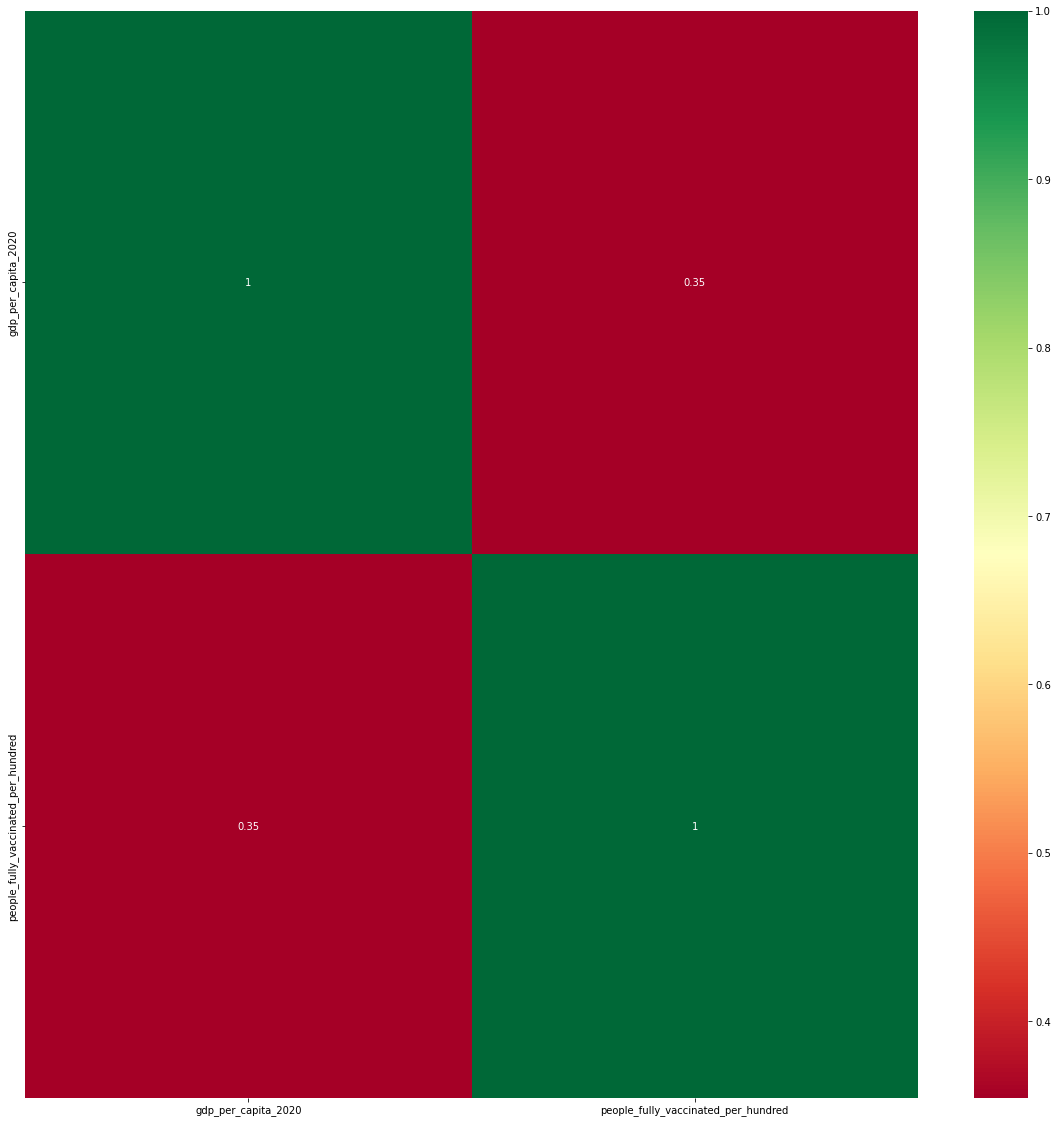

In [103]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['gdp_per_capita_2020', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [104]:
#trust_ingovernment_2019
df0 = pd.read_csv('trust_in_government.csv')  
df0 = df0.loc[(df0["TIME"]==2019)][["LOCATION","Value"]]
df0.rename(columns={"Value": "trust_in_government_2019"}, inplace=True) #40
df1 = pd.read_csv('betterlifeindex_2019.csv')[["LOCATION","Country"]]
df1.rename(columns={"Country": "Country Name"}, inplace=True) #40
data = pd.merge(df0, df1, on=["LOCATION"]).drop_duplicates().reset_index()[["trust_in_government_2019", "Country Name"]]
data = pd.merge(data, data0, on=["Country Name"])
data

,trust_in_government_2019,Country Name,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,46.870001,Australia,52397.387048,61.01
1,51.233826,Austria,55648.874565,62.03
2,32.790115,Belgium,52626.581638,73.63
3,54.928097,Canada,48090.992167,73.73
4,63.299903,Denmark,60551.640172,75.72
5,63.918815,Finland,50810.527408,68.51
6,38.184924,France,46712.010113,67.70
7,56.846043,Germany,54263.649615,65.77
8,48.393419,Hungary,33253.880030,59.39
9,58.121598,Ireland,95237.241299,75.23


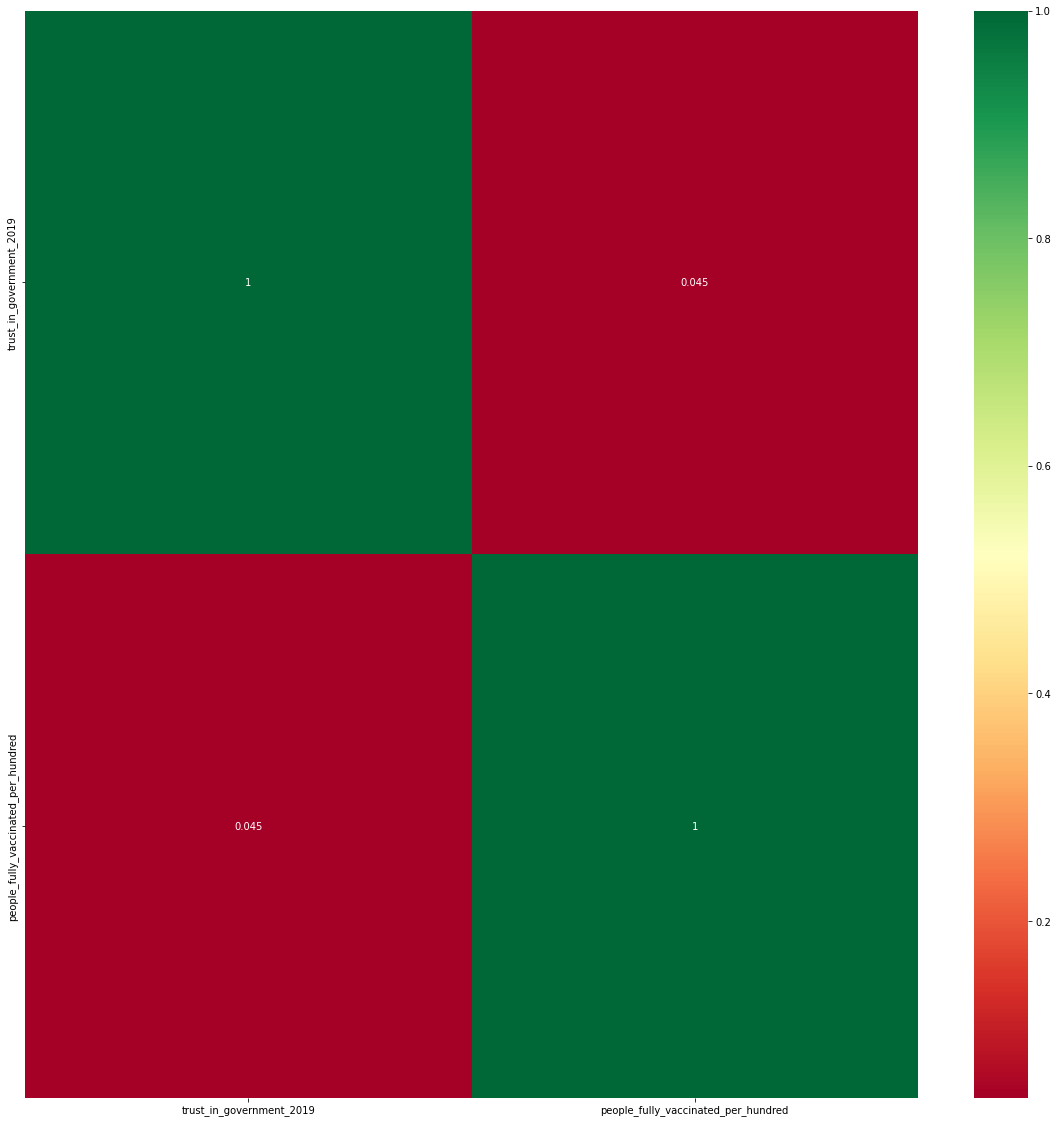

In [105]:
corrmat = data.corr()                           # nothing
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['trust_in_government_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [106]:
df4 = pd.read_csv('secondary_education.csv')  
df4 = df4.loc[(df4["TIME"]==2019)].loc[(df4["SUBJECT"]=="UPPSRY")][["LOCATION","Value"]]
df4.rename(columns={"Value": "secondary_education_2019"}, inplace=True)
data = pd.merge(df4, df1, on=["LOCATION"]).drop_duplicates().reset_index()[["Country Name","secondary_education_2019"]]
data.rename(columns={"Country": "Country Name"}, inplace=True) #40
data = pd.merge(data, data0, on=["Country Name"])
data

,Country Name,secondary_education_2019,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Austria,77.636,55648.874565,62.03
1,Belgium,77.047,52626.581638,73.63
2,Canada,84.317,48090.992167,73.73
3,Denmark,81.629,60551.640172,75.72
4,Finland,84.907,50810.527408,68.51
5,Germany,73.092,54263.649615,65.77
6,Hungary,77.257,33253.880030,59.39
7,Italy,89.629,41890.208794,70.92
8,New Zealand,85.911,44212.876475,58.40
9,Norway,83.578,63287.607008,68.28


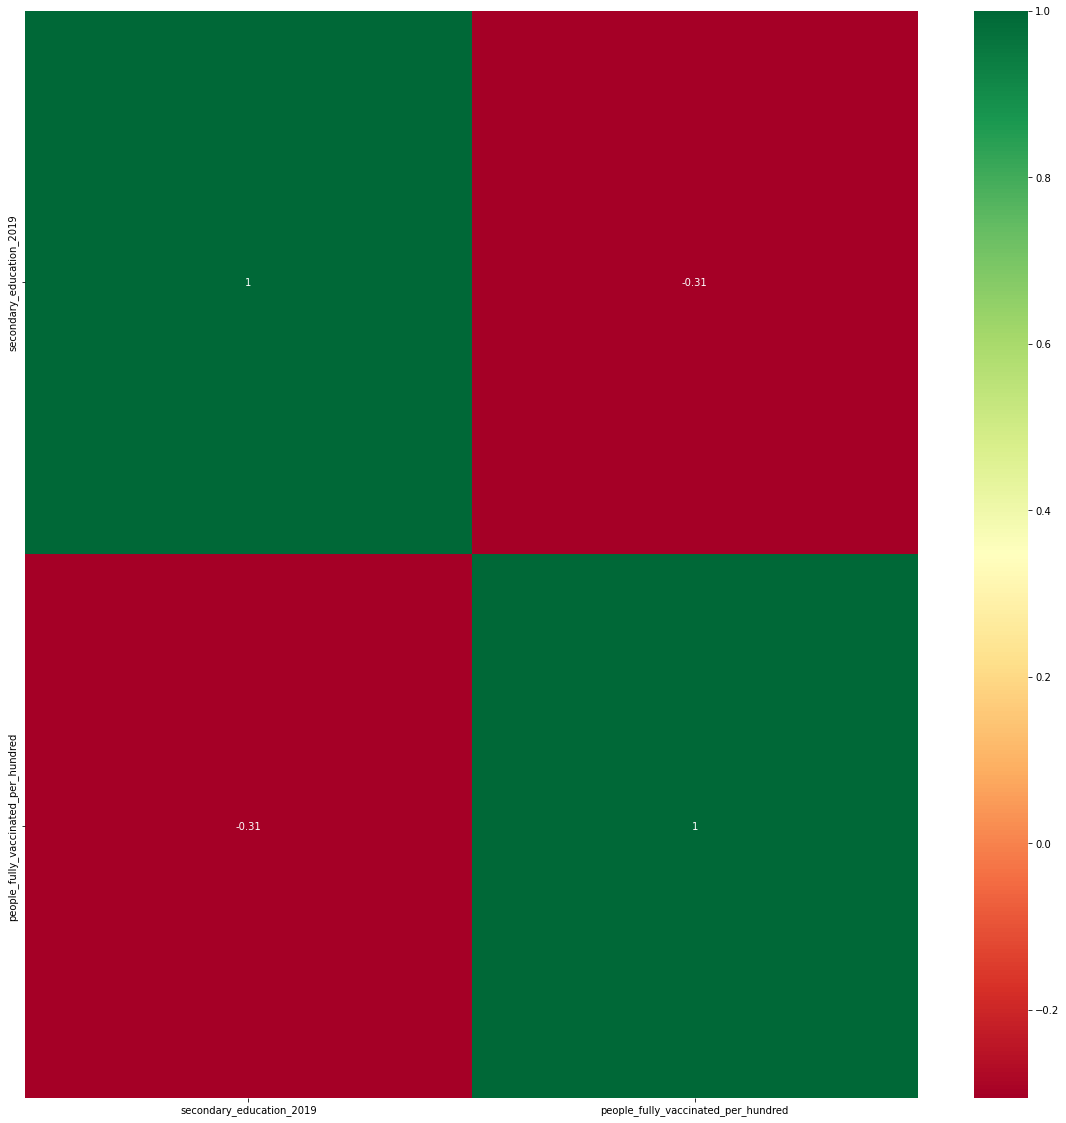

In [107]:
corrmat = data.corr()                     ## leichte tendenz dagegen! (fragwürdig bei 13 Ländern) ##gleich bei 20
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['secondary_education_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [108]:
df4 = pd.read_csv('tertiary_education.csv')[["LOCATION","SUBJECT", "TIME", "Value"]]
df4 = df4.loc[(df4["TIME"]==2019)].loc[(df4["SUBJECT"]=="BACHR_MEN")|(df4["SUBJECT"]=="BACHR_WOMEN")]
df4.rename(columns={"Value": "tertiary_education_2019"}, inplace=True)


df4 = df4.pivot(index="LOCATION", columns="SUBJECT", values="tertiary_education_2019")
df4['tertiary_education_2019'] = df4["BACHR_MEN"] + df4['BACHR_WOMEN']
df4 = df4["tertiary_education_2019"].to_frame()
df4 = df4.reset_index() 
data = pd.merge(df4, df1, on=["LOCATION"]).drop_duplicates().reset_index()
data.rename(columns={"Country": "Country Name"}, inplace=True) #40
data = pd.merge(data0, data, on=["Country Name"])
data


,Country Name,gdp_per_capita_2020,people_fully_vaccinated_per_hundred,index,LOCATION,tertiary_education_2019
0,Australia,52397.387048,61.01,0,AUS,69.343
1,Austria,55648.874565,62.03,59,AUT,37.418
2,Belgium,52626.581638,73.63,121,BEL,80.736
3,Switzerland,71760.586213,62.92,183,CHE,72.556
4,Germany,54263.649615,65.77,348,DEU,64.156
5,Denmark,60551.640172,75.72,410,DNK,81.471
6,Spain,38343.155224,79.69,472,ESP,63.931
7,Estonia,37925.116799,56.70,534,EST,54.380
8,Finland,50810.527408,68.51,598,FIN,72.916
9,United Kingdom,45852.688886,66.83,662,GBR,75.625


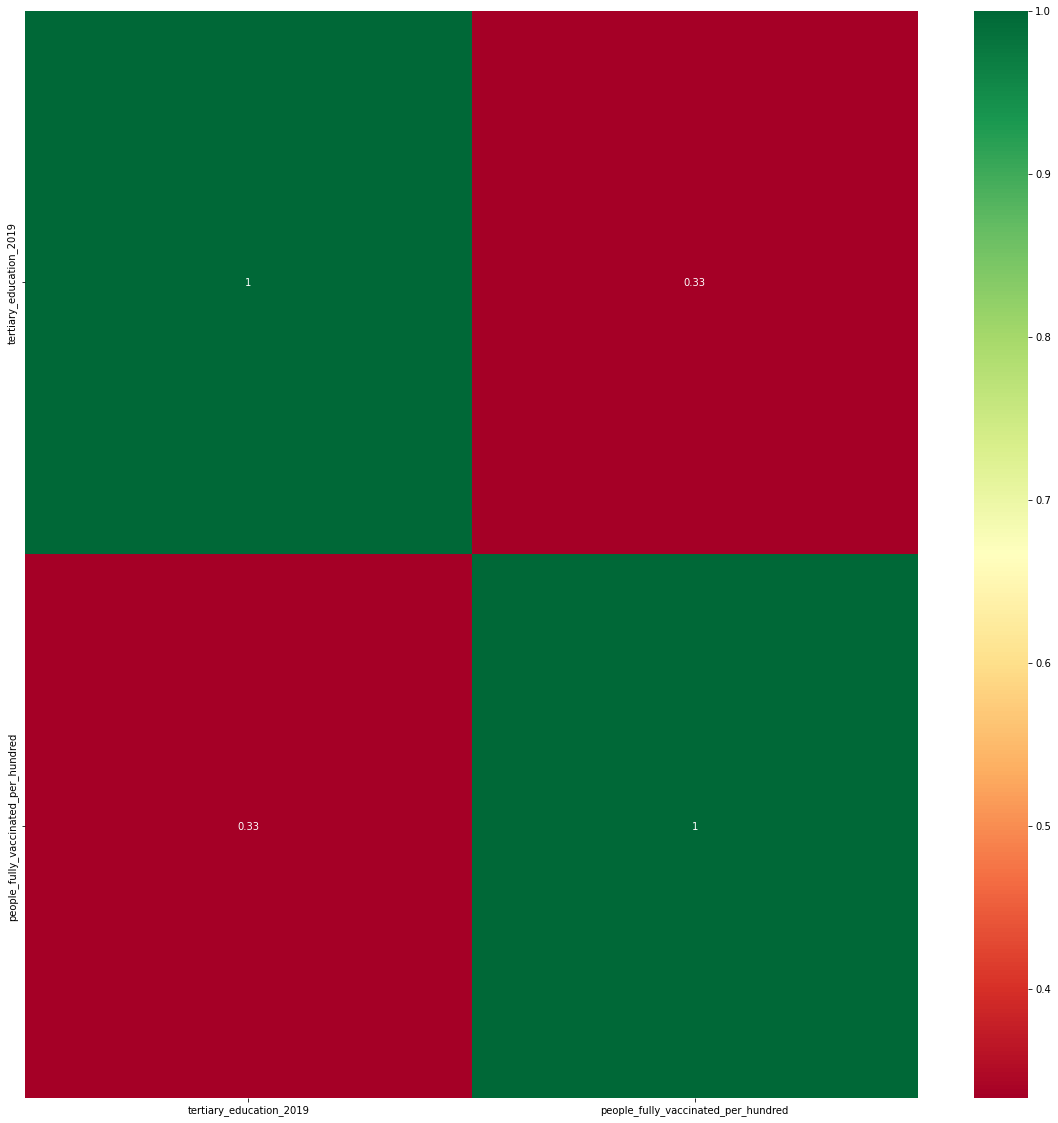

In [109]:
corrmat = data.corr()                    # tertiary towards education helps
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['tertiary_education_2019', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

In [110]:
df1 = pd.read_csv('unemployment_rate.csv') 
df1 = df1[["Country Name","2020"]] # select and reduce
df1.rename(columns={"2020": "unemplyment_2020"}, inplace=True)
df1=df1.loc[(df1["unemplyment_2020"]==df1["unemplyment_2020"])]
data = pd.merge(df1, data0, on=["Country Name"])
data

,Country Name,unemplyment_2020,gdp_per_capita_2020,people_fully_vaccinated_per_hundred
0,Australia,6.610000,52397.387048,61.01
1,Austria,5.770000,55648.874565,62.03
2,Belgium,6.010000,52626.581638,73.63
3,Bahrain,4.090000,43739.561523,65.11
4,Canada,9.480000,48090.992167,73.73
5,Switzerland,4.940000,71760.586213,62.92
6,Cyprus,7.210000,38458.191262,63.42
7,Germany,4.310000,54263.649615,65.77
8,Denmark,5.660000,60551.640172,75.72
9,Spain,15.670000,38343.155224,79.69


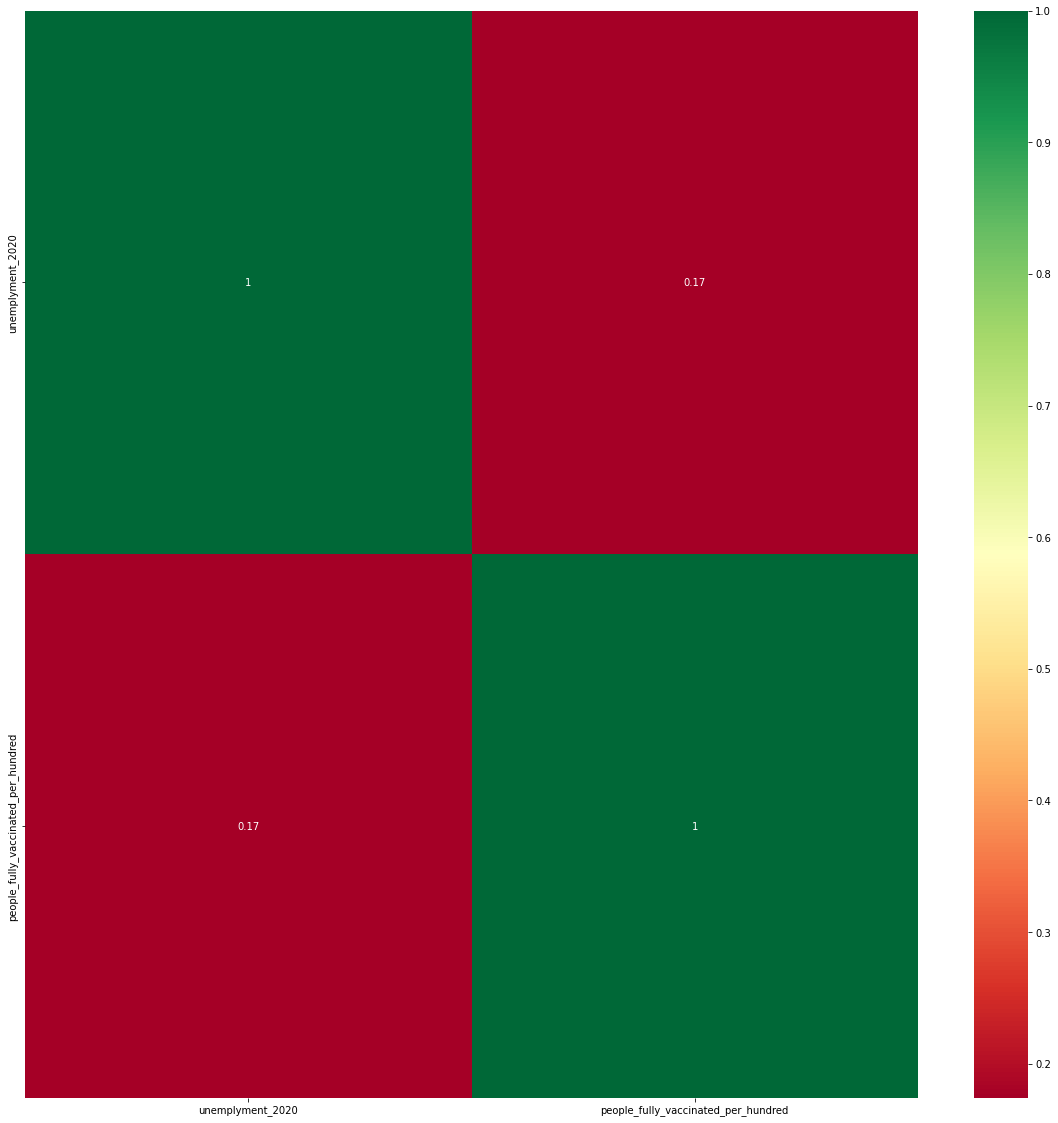

In [111]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[['unemplyment_2020', 'people_fully_vaccinated_per_hundred']].corr(),annot=True,cmap="RdYlGn")

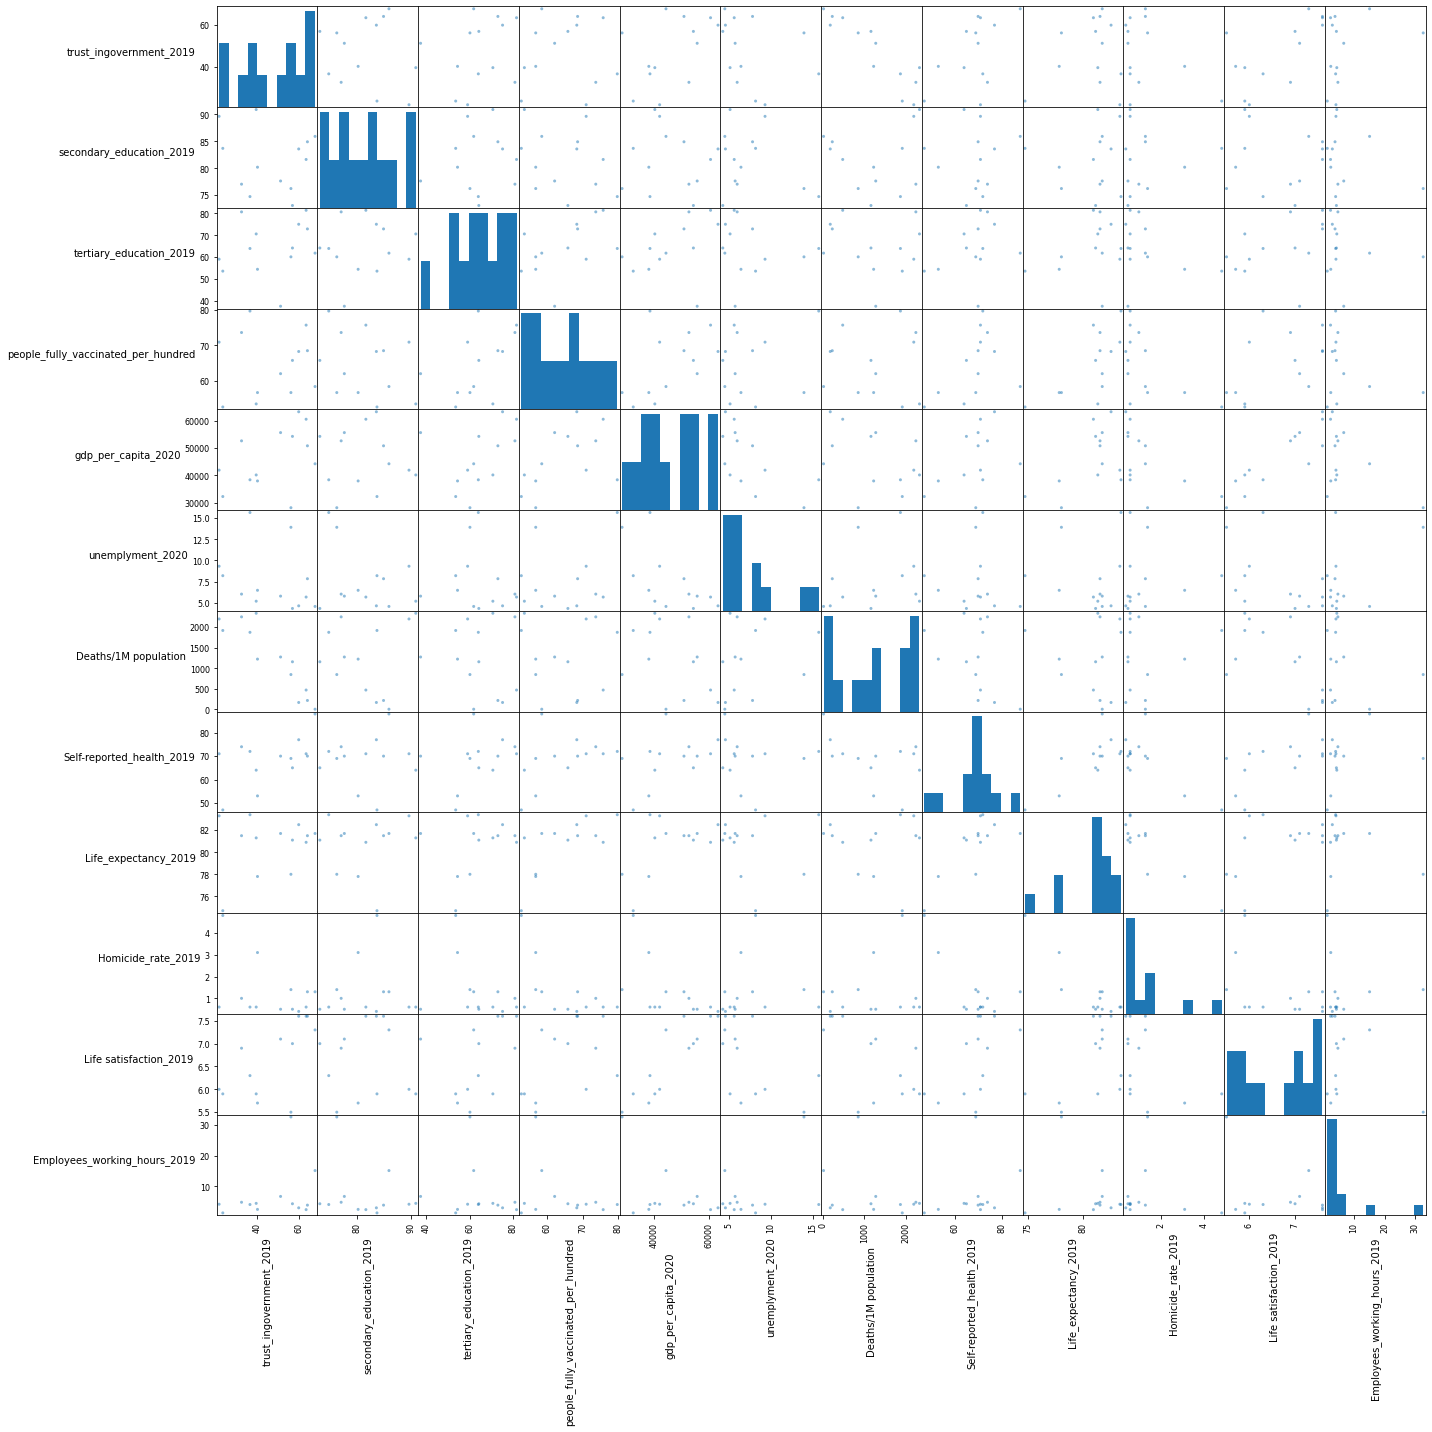

In [24]:
axes = pd.plotting.scatter_matrix(data, figsize=(20,20))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

/home/yasin/Desktop/influences-on-the-covid-19-vaccination-rates/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yasin/Desktop/influences-on-the-covid-19-vaccination-rates/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yasin/Desktop/influences-on-the-covid-19-vaccination-rates/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and

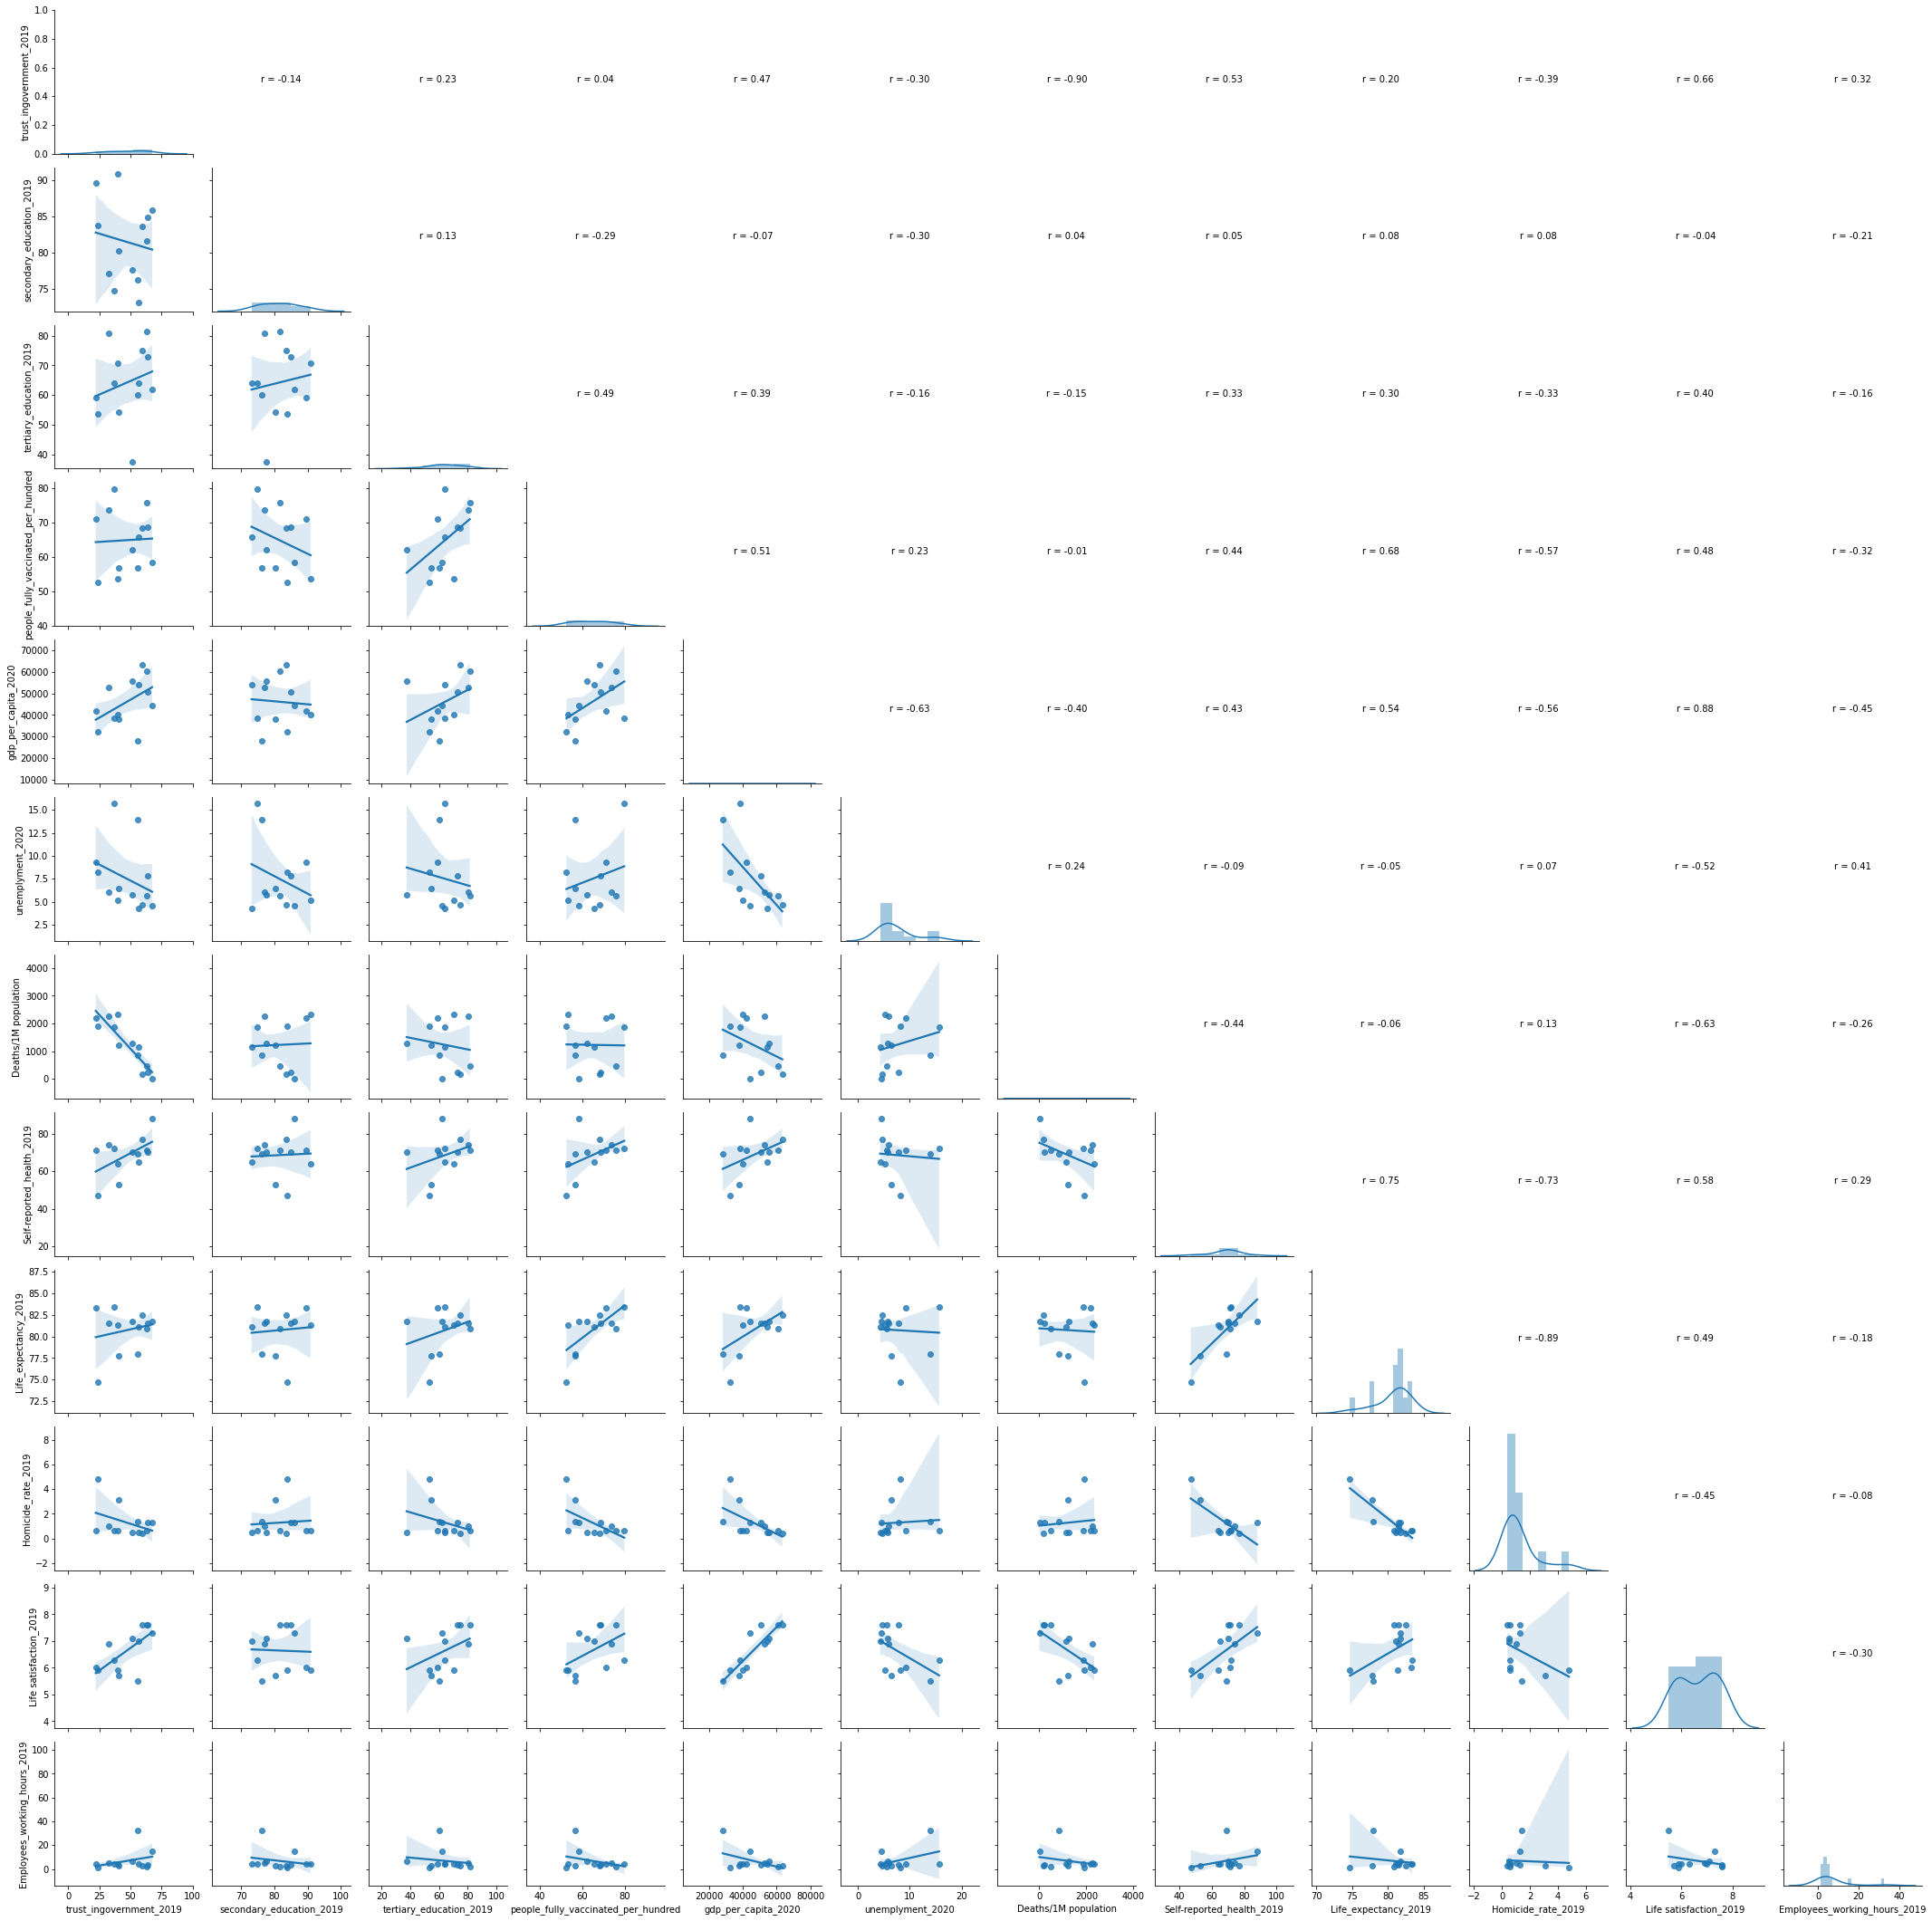

In [25]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(data)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)